In [14]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Exercise 5 : Classification Tree
## Objective:
#### Note that our Housing Data has a Binary (two-level) Categorical Variable named “CentralAir”, with values “Y” and “N”.
#### In the previous sessions, we have seen some numeric variables in this dataset that are important to predict “SalePrice”.
#### In this lab session, we will try to predict if a house has Central Air Conditioning or not using some other variables.
#### Typical steps to follow while building a supervised machine learning model on a given dataset:
#### o Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.
#### o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.
#### o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.
#### o Check the Prediction Accuracy of the model on both the Train and the Test sets using the “Confusion Matrix”.


## Problem 1 : Predicting CentralAir using SalePrice
In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.
#### Hints and Pointers
#### o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split.
#### o If you want to change the max depth of the tree, check the input parameters needed to instantiate the model.
#### o Think about the accuracy metrics for a tree carefully to determine which model is better and in which metrics.

### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [16]:
data = pd.read_csv('train.csv')

In [17]:
X = pd.DataFrame(data['SalePrice'])
y = pd.DataFrame(data['CentralAir'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42)


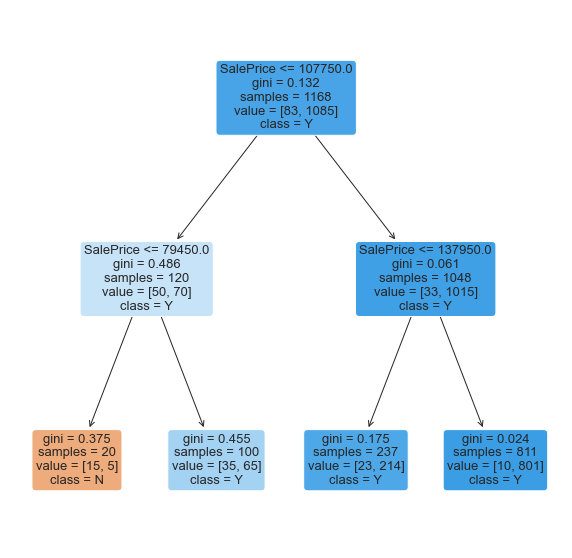

In [19]:
tree_d2 = DecisionTreeClassifier(max_depth=2)
tree_d2.fit(X_train, y_train)

y_train_pred_d2 = tree_d2.predict(X_train)
y_test_pred_d2 = tree_d2.predict(X_test)

f = plt.figure(figsize=(10,10))

plot_tree(tree_d2, filled=True, rounded=True,
         feature_names=["SalePrice"],
         class_names=["N", "Y"])
plt.show()

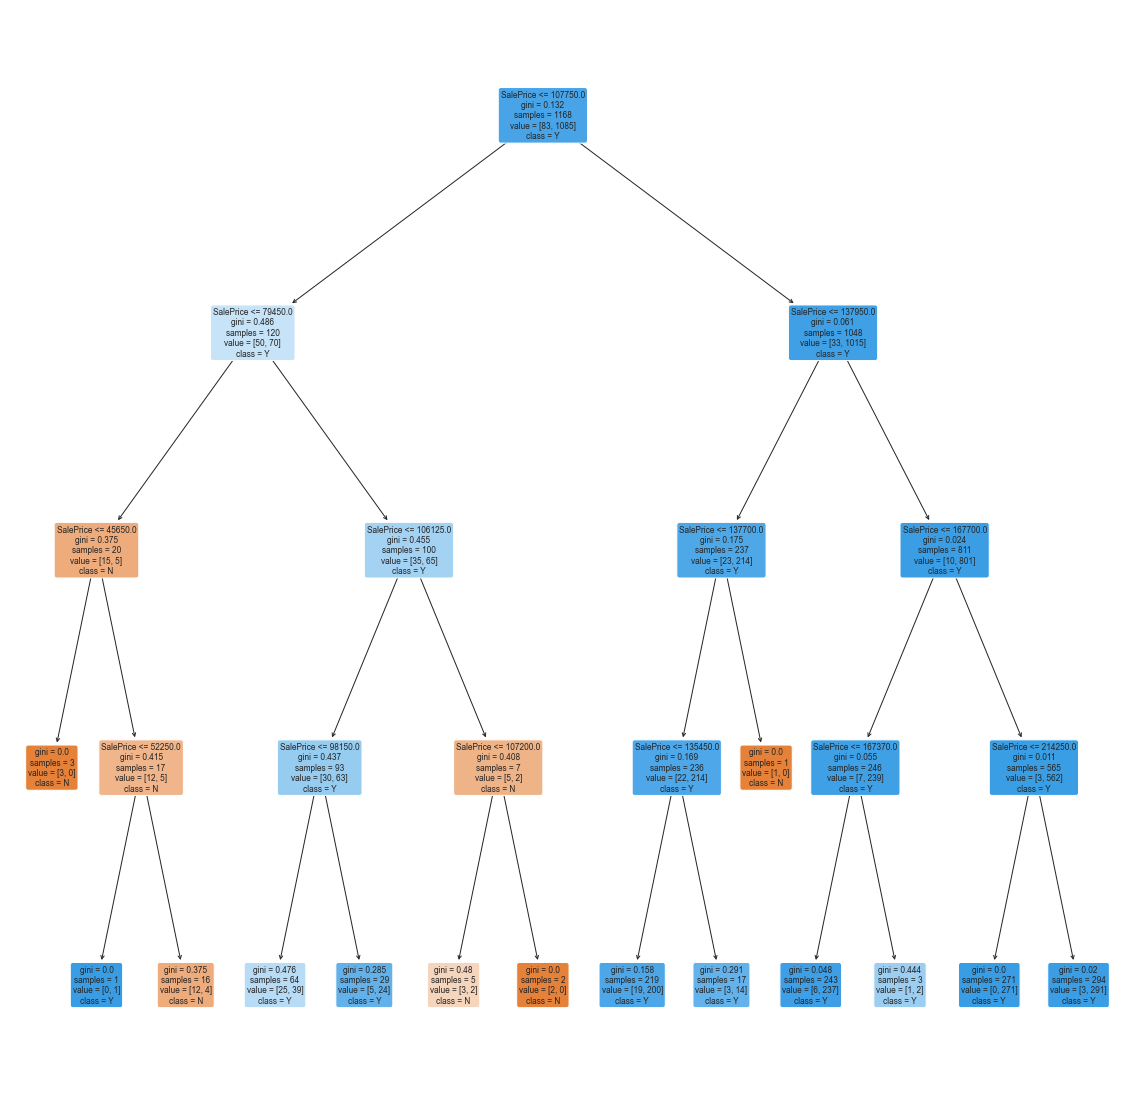

In [20]:
tree_d4 = DecisionTreeClassifier(max_depth=4)
tree_d4.fit(X_train, y_train)

y_train_pred_d4 = tree_d4.predict(X_train)
y_test_pred_d4 = tree_d4.predict(X_test)

f = plt.figure(figsize=(20,20))

plot_tree(tree_d4, filled=True, rounded=True,
         feature_names=["SalePrice"],
         class_names=["N", "Y"])
plt.show()

### b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
## Function to get TPR(True Positive Rate) and FPR(False Positive Rate)
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

Train Confusion Matrix - Depth 2
Classification Accuracy:  0.9375
TPR:  0.9953917050691244
FPR:  0.8192771084337349
Test Confusion Matrix - Depth 2
Classification Accuracy:  0.958904109589041
TPR:  0.9785714285714285
FPR:  0.5


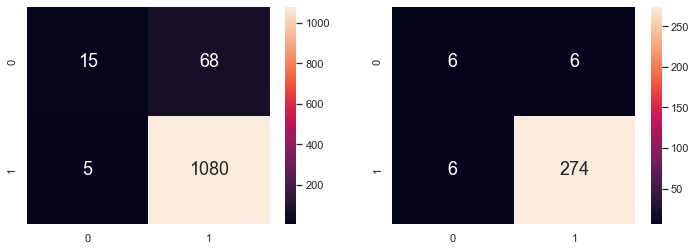

In [23]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Train Confusion Matrix - Depth 2")
sb.heatmap(confusion_matrix(y_train, y_train_pred_d2), annot=True, fmt='.0f', annot_kws={"size":18}, ax = axes[0])
print("Classification Accuracy: ", tree_d2.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, y_train_pred_d2))
print('FPR: ', get_FPR(y_train, y_train_pred_d2))

print("Test Confusion Matrix - Depth 2")
sb.heatmap(confusion_matrix(y_test, y_test_pred_d2), annot=True, fmt='.0f', annot_kws={"size":18}, ax = axes[1])
print("Classification Accuracy: ", tree_d2.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, y_test_pred_d2))
print('FPR: ', get_FPR(y_test, y_test_pred_d2))

Train Confusion Matrix - Depth 4
Classification Accuracy:  0.9417808219178082
TPR:  0.9944700460829493
FPR:  0.7469879518072289
Test Confusion Matrix - Depth 4
Classification Accuracy:  0.9486301369863014
TPR:  0.9678571428571429
FPR:  0.5


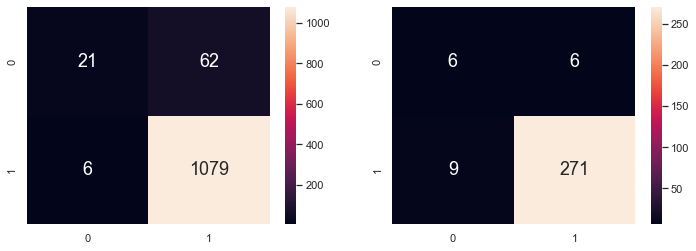

In [24]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Train Confusion Matrix - Depth 4")
sb.heatmap(confusion_matrix(y_train, y_train_pred_d4), annot=True, fmt='.0f', annot_kws={"size":18}, ax = axes[0])
print("Classification Accuracy: ", tree_d4.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, y_train_pred_d4))
print('FPR: ', get_FPR(y_train, y_train_pred_d4))

print("Test Confusion Matrix - Depth 4")
sb.heatmap(confusion_matrix(y_test, y_test_pred_d4), annot=True, fmt='.0f', annot_kws={"size":18}, ax = axes[1])
print("Classification Accuracy: ", tree_d4.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, y_test_pred_d4))
print('FPR: ', get_FPR(y_test, y_test_pred_d4))

#### Answer: Model 2 with max depth 4 is slightly better than Model 1 with max depth 2 on both training and testing sets in terms of all 3 matrics (Classification Accuracy, FPR and TPR). Model 2 has a significantly lower FPR on the training set compared to Model 1. For Model 2, there are signs of "overfitting" on the testing set where the Classification Accuracy of Model 2 is lower than Model 1 despite the training set showing the opposite results. However, the difference in TPR and FPR for the testing sets for both models do not show a significant difference, hence, i would say Model 2 is slightly better overall. 

## Problem 2 : Predicting CentralAir using Other Variables
#### Hints and Pointers
#### o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.
#### o Optional: You may think of writing a simple Python function to do classification on variable(s) in a given dataset.
### Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) to predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

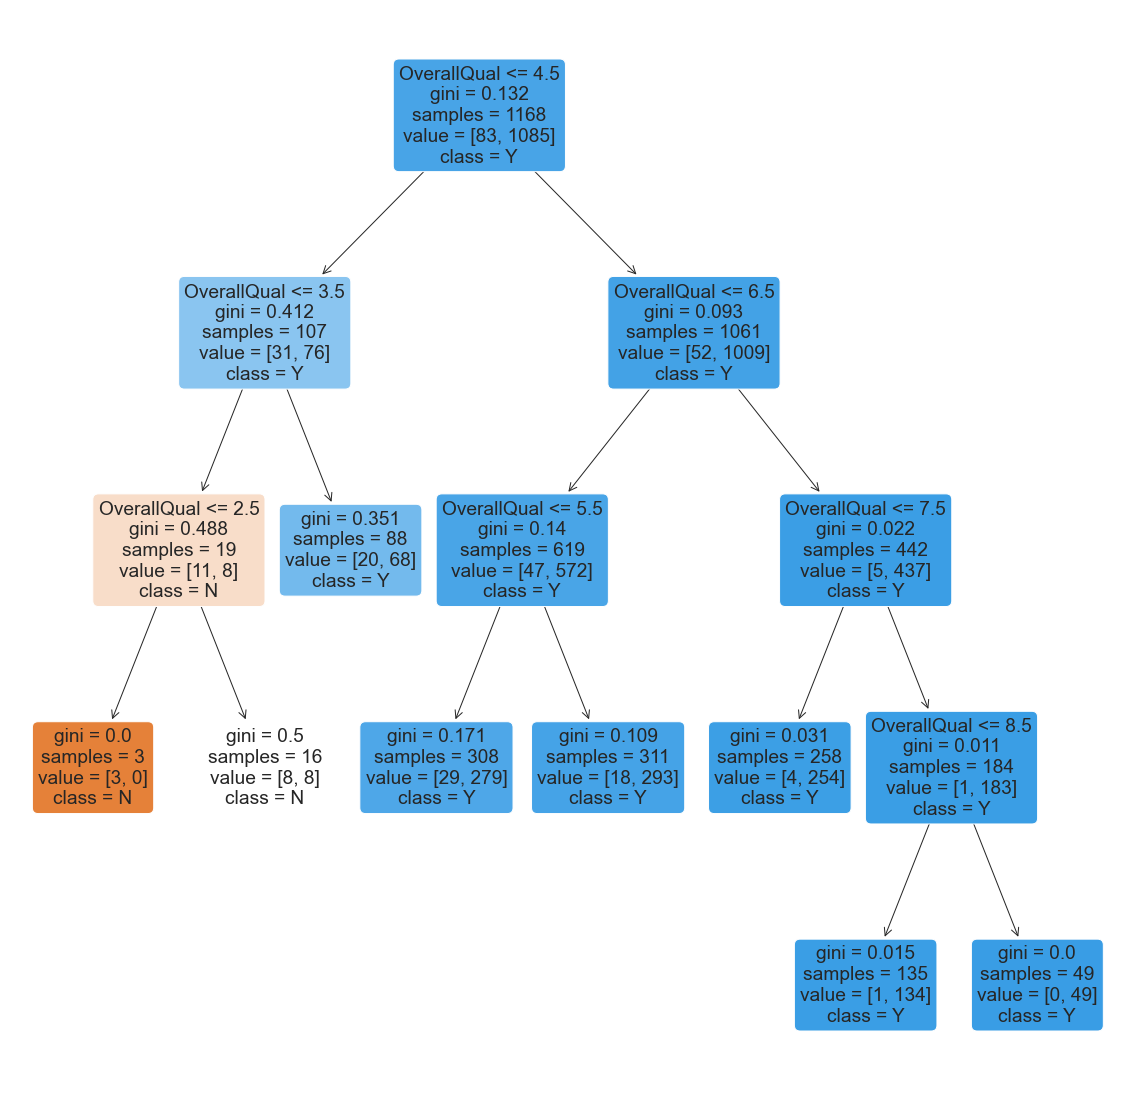

In [25]:
X1 = pd.DataFrame(data['OverallQual'])

#Splitting the dataset into ratio 80:20 train:test split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42) 
    
#Printing the Classification Tree
tree_d4 = DecisionTreeClassifier(max_depth=4)
tree_d4.fit(X1_train, y_train)
y_train_pred_d4 = tree_d4.predict(X1_train)
y_test_pred_d4 = tree_d4.predict(X1_test)
f = plt.figure(figsize=(20,20))
plot_tree(tree_d4, filled=True, rounded=True, feature_names=["OverallQual"], class_names=["N", "Y"])
plt.show()

    
    
    

Train Confusion Matrix - Depth 4


NameError: name 'X2_train' is not defined

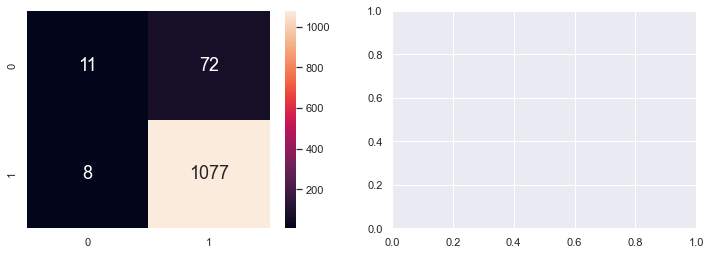

In [26]:
#Confusion Matrix,Classification Accuracy, TPR and FPR
f, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Train Confusion Matrix - Depth 4")
sb.heatmap(confusion_matrix(y_train, y_train_pred_d4), annot=True, fmt='.0f', annot_kws={"size":18}, ax = axes[0])
print("Classification Accuracy: ", tree_d4.score(X2_train, y_train))
print('TPR: ', get_TPR(y_train, y_train_pred_d4))
print('FPR: ', get_FPR(y_train, y_train_pred_d4))

print("Test Confusion Matrix - Depth 4")
sb.heatmap(confusion_matrix(y_test, y_test_pred_d4), annot=True, fmt='.0f', annot_kws={"size":18}, ax = axes[1])
print("Classification Accuracy: ", tree_d4.score(X2_test, y_test))
print('TPR: ', get_TPR(y_test, y_test_pred_d4))
print('FPR: ', get_FPR(y_test, y_test_pred_d4))


In [ ]:
X2 = pd.DataFrame(data['YearBuilt'])

#Splitting the dataset into ratio 80:20 train:test split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42) 
    
#Printing the Classification Tree
tree_d4 = DecisionTreeClassifier(max_depth=4)
tree_d4.fit(X2_train, y_train)
y_train_pred_d4 = tree_d4.predict(X2_train)
y_test_pred_d4 = tree_d4.predict(X2_test)
f= plt.figure(figsize=(20,20))
plot_tree(tree_d4, filled=True, rounded=True, feature_names=["YearBuilt"], class_names=["N", "Y"])
plt.show()



In [ ]:
#Confusion Matrix,Classification Accuracy, TPR and FPR
f, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Train Confusion Matrix - Depth 4")
sb.heatmap(confusion_matrix(y_train, y_train_pred_d4), annot=True, fmt='.0f', annot_kws={"size":18}, ax = axes[0])
print("Classification Accuracy: ", tree_d4.score(X2_train, y_train))
print('TPR: ', get_TPR(y_train, y_train_pred_d4))
print('FPR: ', get_FPR(y_train, y_train_pred_d4))

print("Test Confusion Matrix - Depth 4")
sb.heatmap(confusion_matrix(y_test, y_test_pred_d4), annot=True, fmt='.0f', annot_kws={"size":18}, ax = axes[1])
print("Classification Accuracy: ", tree_d4.score(X2_test, y_test))
print('TPR: ', get_TPR(y_test, y_test_pred_d4))
print('FPR: ', get_FPR(y_test, y_test_pred_d4))


#### Answer: Model 3('YearBuilt') is the worst model given that the FPR is significantly higher than Model 1 ('SalePrice') and Model 2 ('OverallQual') while sharing similar Classification Accuracy and TPR on both the train and test sets. Comparing Model 1 and Model 2, Model 2 is slightly better given that it has a lower FPR while having similar Classification Accuracy and TPR. Hence, i would conclude in my case given the 3 matrics, Model 1 will be the best model among the 3 models.  

## Problem 3 : Understanding the Misclassified Samples
In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.
#### Hints and Pointers
#### o In Part (a), you may print the model in Problem 1(a), or fit the max depth 4 classification tree model once again.
#### o You may simply “observe” which leaf node has the maximum number of False Positives; no need to code for it.
#### o Think about how data points (samples) end up in a leaf node based on tree splits; it will help you isolate samples.
#### o Part (b) is a simple continuation of part (a), where you need to “filter” out the False Positives from the samples.

### (a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

In [ ]:
tree_d4 = DecisionTreeClassifier(max_depth=4)
tree_d4.fit(X_train, y_train)

y_train_pred_d4 = tree_d4.predict(X_train)
y_test_pred_d4 = tree_d4.predict(X_test)

f = plt.figure(figsize=(20,10))

plot_tree(tree_d4, filled=True, rounded=True,
         feature_names=["SalePrice"],
         class_names=["Y", "N"])
plt.show()

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)

In [ ]:
#Going through the Tree to the leaf node with the highest number of FP
subset = train_data[train_data['SalePrice'] <= 107750]
subset = subset[subset['SalePrice'] > 79450]
subset = subset[subset['SalePrice'] <= 106125]
subset = subset[subset['SalePrice'] <= 98150]

In [ ]:
subset

### (b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a).

In [ ]:
subset = subset[subset['CentralAir'] == 'N']

In [ ]:
subset